## Advanced Linear Regression assignment

### Budhaditya Saha

### Business Goal:
### You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Steps:

### 1. Data understanding & exploration

### 2. Data cleaning

### 3. Data preparation

### 4. Linear Regression modelling, RFE for coarse tuning, P-value/ VIF for fine tuning

### 5. Grid Search

### 6. Ridge modelling

### 7. Lasso modelling

### 8. Modelling for subjective question 1

### 9. Modelling for subjective question 3

In [122]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## 1. Data understanding and exploration

In [2]:
# reading the dataset

housing = pd.read_csv('train.csv')

In [3]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# number of rows and columns in the dataset
housing.shape

(1460, 81)

In [5]:
#summary of the dataset - 1460 rows; 81 columns; significant missing data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Understanding data dictionary

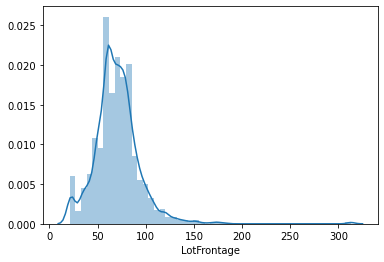

In [7]:
# LotFrontage: Linear feet of street connected to property
sns.distplot(housing['LotFrontage'])

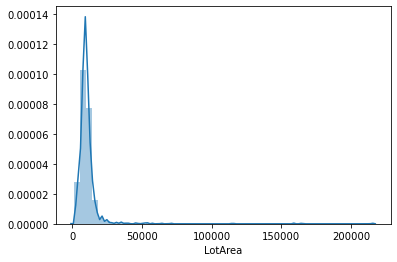

In [8]:
# LotArea: Lot size in square feet
sns.distplot(housing['LotArea'])

In [9]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
housing['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [10]:
# MiscFeature: Miscellaneous feature not covered in other categories
housing['MiscFeature'].astype('category').value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

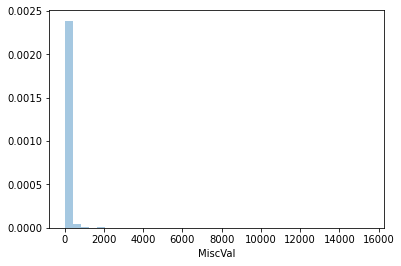

In [11]:
# MiscVal: $Value of miscellaneous feature
sns.distplot(housing['MiscVal'])

In [12]:
# PoolQC: Pool quality
housing['PoolQC'].astype('category').value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [13]:
# YearBuilt: Original construction date
housing['YearBuilt'].astype('category').value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [14]:
# YrSold: Year Sold (YYYY)
housing['YrSold'].astype('category').value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

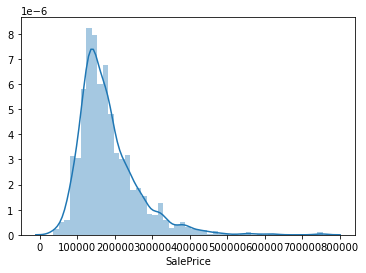

In [15]:
# target variable: Sale Price
sns.distplot(housing['SalePrice'])
plt.show()

#### Data Exploration

#### To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. 

#### We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.


In [16]:
#all categorical variables from the dataset
category = housing.select_dtypes(include='object')

In [17]:
category.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [18]:
#all numeric (float and int) variables in the dataset
nums = housing.select_dtypes(include=['float64','int64'])

In [19]:
nums.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### Here, although the list of the following variables are numeric (int), we'd rather treat them as categorical since they consists of discrete values. Also, we do not want the column 'Id'. 
MSSubClass
YearBuilt
YearRemodAdd
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
MiscVal
MoSold
YrSold

In [20]:
# dropping the variables which need to be treated as categorical

nums = nums.drop(['Id','MSSubClass', 'YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'MoSold', 'YrSold'], axis=1)

In [21]:
nums.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,3,836,192,84,0,0,0,0,0,250000


In [22]:
nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   OverallCond    1460 non-null   int64  
 4   MasVnrArea     1452 non-null   float64
 5   BsmtFinSF1     1460 non-null   int64  
 6   BsmtFinSF2     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  LowQualFinSF   1460 non-null   int64  
 12  GrLivArea      1460 non-null   int64  
 13  GarageCars     1460 non-null   int64  
 14  GarageArea     1460 non-null   int64  
 15  WoodDeckSF     1460 non-null   int64  
 16  OpenPorchSF    1460 non-null   int64  
 17  EnclosedPorch  1460 non-null   int64  
 18  3SsnPorc


#### We will now plot the correlations between the numeric variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [23]:
# correlation matrix
cor = nums.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.251646,-0.059213,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,...,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.105806,-0.005636,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,...,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
OverallQual,0.251646,0.105806,1.000000,-0.091932,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,...,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.790982
OverallCond,-0.059213,-0.005636,-0.091932,1.000000,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,...,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.077856
MasVnrArea,0.193458,0.104160,0.411876,-0.128101,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,...,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.239666,-0.046231,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,...,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.059119,0.040229,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,...,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.308159,-0.136841,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,...,0.214175,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.537808,-0.171098,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,...,0.434585,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.476224,-0.144203,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,...,0.439317,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852


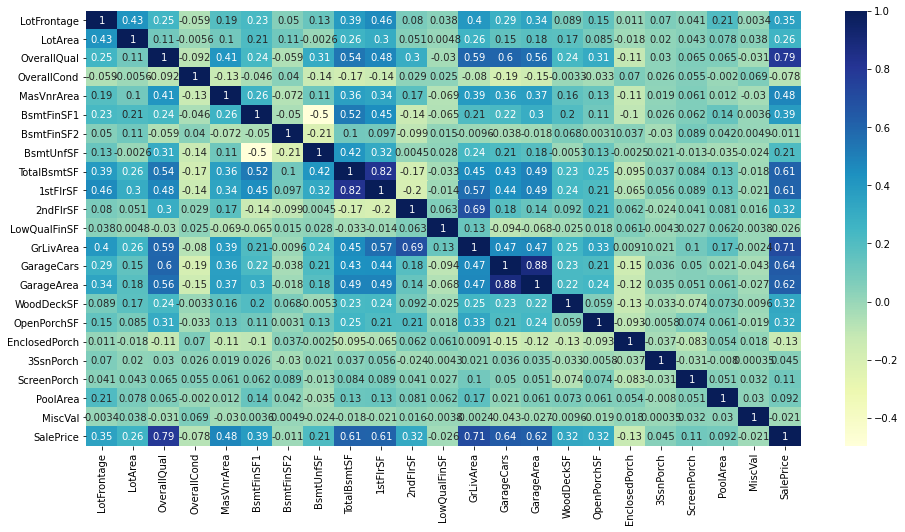

In [24]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

The heatmap shows some useful insights:

Correlation of Sale Price with independent variables:

Price is highly (positively) correlated with Overall Quality, GrLivArea, GarageCars, GarageArea, TotalBsmntSF, 1stFlrSF. This suggest that the if the housing is having garage, basement then the price goes up. Also, higher the area, higher is the price.

Price is negatively correlated with BsmntFinSF2, EnclosedPorch, MiscVal. Although this doesn't indicate a definite pattern, however more insights will be available as we proceed with the modelling.

Correlation among independent variables:

Some independent variables are highly correlated: (1stFlrSF-TotalBsmntSF), (GrLivArea-2ndFlrSF), (GarageArea-GarageCars), (BsmntFinSF1-TotalBsmtSF). All these hint towards the areas of the various places within the house. 

Thus, while building the model, we'll have to pay attention to multicollinearity.

### We now look into some derived metrices

In [25]:
# determine the age of the propoerty at the time of selling. Add the property age as the additional column to the data frame.
housing["age"] = (housing['YrSold'] - housing['YearBuilt'])
housing['age'].value_counts()

1      100
0       64
4       41
2       39
3       36
      ... 
79       1
109      1
135      1
107      1
136      1
Name: age, Length: 122, dtype: int64

In [26]:
# drop the columns "YrSold" and "Year Built" as they have now become redundant. 
# Also Year remodelled, Garage year built and Month sold are not significant and hence can be dropped.
housing = housing.drop(['YrSold', 'YearBuilt','YearRemodAdd', 'GarageYrBlt', 'MoSold'], axis=1)
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition,SalePrice,age
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,223500,7
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Abnorml,140000,91
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,WD,Normal,250000,8


## 2. Data Cleaning 

We will now conduct some data cleaning steps.

There are missing values in the dataset which needs to be treated. Also some variables are not in the correct format, i.e. they are numerical variables, which should rather be categorical variables (so that dummy variable are created for the categories).


In [27]:
# % of Null Values in the columns
a = housing.columns[housing.isnull().any()]
round(100 * housing[a].isnull().sum()/ len(housing.index), 2)

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [28]:
# drop the columns with null values > 85%. Those would be - Alley, PoolQC, Fence, MiscFeature
# Also drop the column ID. The column MiscVal can also be dropped as it consists of all "0" for the Null Values of MiscFeature

housing = housing.drop(['Alley', 'PoolQC', 'MiscFeature', 'Id', 'MiscVal'], axis=1)



Now, we will convert the variables to the correct format, i.e. some variables which are numeric, need to be converted to categorical variables.
MSSubClass
YearBuilt
YearRemodAdd
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
MoSold
YrSold

In [29]:
# converting those numerical variables to categorical for which we need to create dummy variables
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['BsmtFullBath'] = housing['BsmtFullBath'].astype('object')
housing['BsmtHalfBath'] = housing['BsmtHalfBath'].astype('object')
housing['FullBath'] = housing['FullBath'].astype('object')
housing['HalfBath'] = housing['HalfBath'].astype('object')
housing['BedroomAbvGr'] = housing['BedroomAbvGr'].astype('object')
housing['KitchenAbvGr'] = housing['KitchenAbvGr'].astype('object')
housing['TotRmsAbvGrd'] = housing['TotRmsAbvGrd'].astype('object')
housing['Fireplaces'] = housing['Fireplaces'].astype('object')
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [30]:
# null values
# Checking % of Null Values in the columns again
a = housing.columns[housing.isnull().any()]
round(100 * housing[a].isnull().sum()/ len(housing.index), 2)

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
Fence           80.75
dtype: float64

We now need to treat the null values

In [31]:
housing.describe(exclude=None)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age
count,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,180921.195890,36.547945
std,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,79442.502883,30.250152
min,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000,8.000000
50%,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,35.000000
75%,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,214000.000000,54.000000
max,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,755000.000000,136.000000


In [32]:
### Approach to fill in the Null values

# Numnerical variables
# Fill the null values of the following variables with their median as they are numerical variable having outliers
housing["LotFrontage"].fillna(housing["LotFrontage"].median(), inplace=True)
housing['MasVnrArea'].fillna(housing['MasVnrArea'].median(), inplace=True)


# Categorical variables
# Fill the null values of the below categorical variables with their Mode
housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0], inplace=True)
housing['Electrical'].fillna(housing['Electrical'].mode()[0], inplace=True)

# Fill the null values of the below categorical variables as "none" since they don't suppose to have any value
housing['BsmtQual'].fillna('none', inplace=True)
housing['BsmtCond'].fillna('none', inplace=True)
housing['BsmtExposure'].fillna('none', inplace=True)
housing['BsmtFinType1'].fillna('none', inplace=True)
housing['BsmtFinType2'].fillna('none', inplace=True)
housing["FireplaceQu"].fillna('none', inplace=True)
housing['GarageType'].fillna('none', inplace=True)
housing['GarageFinish'].fillna('none', inplace=True)
housing['GarageQual'].fillna('none', inplace=True)
housing['GarageCond'].fillna('none', inplace=True)
housing['Fence'].fillna('none', inplace=True)

In [33]:
# check for the missing values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

All missing values are now treated

#### Creating the Dummy variable for the categorical columns

In [34]:
# dummy variables

housing = pd.get_dummies(housing, columns = housing.select_dtypes(include = 'object').columns, 
                       prefix = housing.select_dtypes(include = 'object').columns, drop_first=True)


In [35]:
pd.set_option('display.max_columns', None)
housing

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

In [36]:
for col1 in housing.columns:
    print (col1)

LotFrontage
LotArea
OverallQual
OverallCond
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
SalePrice
age
MSSubClass_30
MSSubClass_40
MSSubClass_45
MSSubClass_50
MSSubClass_60
MSSubClass_70
MSSubClass_75
MSSubClass_80
MSSubClass_85
MSSubClass_90
MSSubClass_120
MSSubClass_160
MSSubClass_180
MSSubClass_190
MSZoning_FV
MSZoning_RH
MSZoning_RL
MSZoning_RM
Street_Pave
LotShape_IR2
LotShape_IR3
LotShape_Reg
LandContour_HLS
LandContour_Low
LandContour_Lvl
Utilities_NoSeWa
LotConfig_CulDSac
LotConfig_FR2
LotConfig_FR3
LotConfig_Inside
LandSlope_Mod
LandSlope_Sev
Neighborhood_Blueste
Neighborhood_BrDale
Neighborhood_BrkSide
Neighborhood_ClearCr
Neighborhood_CollgCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_Gilbert
Neighborhood_IDOTRR
Neighborhood_MeadowV
Neighborhood_Mitchel
Neighborhood_NAmes
Neighborhood_NPkVill
Neighborhood_NWAmes
Neighborhood

In [37]:
# Outliers
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

## 3. Data preparation

In [38]:
# split into train and test sets
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(housing, train_size=0.7, test_size = 0.3, random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 285)
(438, 285)


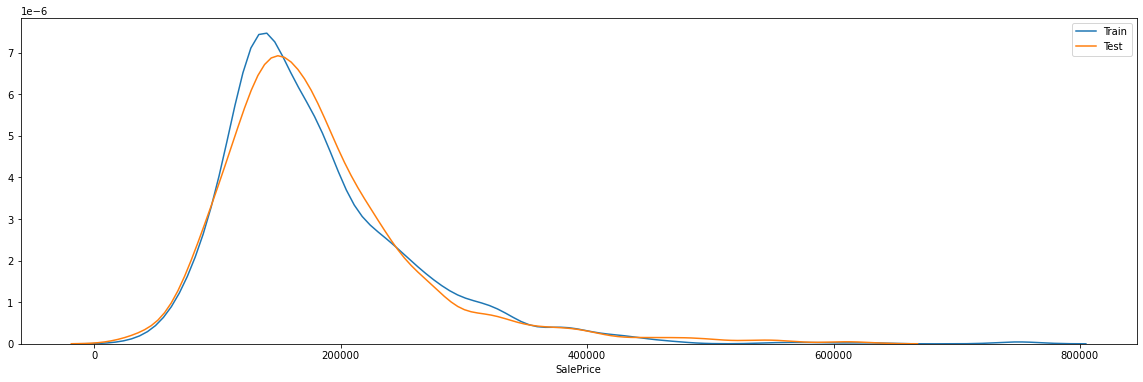

In [39]:
# plot the SalePrice for train and test

plt.figure(figsize=(20, 6))
plt.subplot(1, 1, 1)
sns.distplot(df_train["SalePrice"], hist=False, label="Train")
plt.legend()

plt.subplot(1, 1, 1)
sns.distplot(df_test["SalePrice"], hist=False, label="Test")
plt.legend()
plt.show()

In [40]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

#### Scaling the Features

We can see the range of the integer values are different for different columns. So it is extremely important to rescale the variables so that they have a comparable scale. I will use MinMax scaling to achieve this.

In [41]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()

In [42]:
# scaling the features for train set

cols = df_train.columns
df_train = pd.DataFrame(scalar.fit_transform(df_train))
df_train.columns = cols
df_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)

In [43]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

In [44]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

In [45]:
# scaling the features for test set

cols = df_test.columns
df_test = pd.DataFrame(scalar.transform(df_test))
df_test.columns = cols
df_test.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=285)

In [46]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

In [47]:
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,Gara

### Dividing into X and y sets for the model building

In [48]:
# Split into X & y

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [49]:
y_train.head()

0    0.087627
1    0.312595
2    0.108457
3    0.114012
4    0.121650
Name: SalePrice, dtype: float64

In [50]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_R

In [51]:
y_test.head()

0    0.118872
1    0.224413
2    0.195945
3    0.248021
4    0.189002
Name: SalePrice, dtype: float64

In [52]:
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_R

## 4. Linear Regression

Using RFE for coarse tuning to reduce the features

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Instantiate
lm = LinearRegression()
# Fit a line
lm.fit(X_train, y_train)


# Running RFE to downselect 30 best features as a coarse tuning
rfe = RFE(lm, 30)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 41),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 44),
 ('MasVnrArea', False, 92),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('GarageCars', False, 73),
 ('GarageArea', False, 40),
 ('WoodDeckSF', False, 138),
 ('OpenPorchSF', False, 109),
 ('EnclosedPorch', False, 253),
 ('3SsnPorch', False, 94),
 ('ScreenPorch', False, 205),
 ('PoolArea', False, 61),
 ('age', False, 45),
 ('MSSubClass_30', False, 136),
 ('MSSubClass_40', False, 195),
 ('MSSubClass_45', False, 116),
 ('MSSubClass_50', False, 222),
 ('MSSubClass_60', False, 82),
 ('MSSubClass_70', False, 96),
 ('MSSubClass_75', False, 106),
 ('MSSubClass_80', False, 175),
 ('MSSubClass_85', False, 119),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 102),
 ('MSSubClass_160', False, 201),
 ('MSSubClass_180', False, 

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'MSSubClass_90', 'Condition2_PosN', 'BldgType_2fmCon',
       'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'BsmtQual_none', 'BsmtCond_none', 'BsmtFinType1_none', 'Heating_OthW',
       'BedroomAbvGr_8', 'TotRmsAbvGrd_14', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

#### Building the model using Statsmodel

In [57]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'MSSubClass_90', 'Condition2_PosN', 'BldgType_2fmCon',
       'BldgType_Duplex', 'RoofMatl_CompShg', 'RoofMatl_Membran',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn',
       'BsmtQual_none', 'BsmtCond_none', 'BsmtFinType1_none', 'Heating_OthW',
       'BedroomAbvGr_8', 'TotRmsAbvGrd_14', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [58]:
# build the first fitted model

import statsmodels.api as sm

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create model
lm = sm.OLS(y_train, X_train_rfe).fit()

# check the summary
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     282.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:35:02   Log-Likelihood:                 1836.9
No. Observations:                1021   AIC:                            -3626.
Df Residuals:                     997   BIC:                            -3507.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2400      0.048    -25.806      0.000      -1.334      -1.146
LotArea                   0.1461      0.029      5.036      0.000       0.089       0.203
OverallQual               0.2591      0.012     21.437      0.000       0.235       0.283
BsmtFinSF1                0.3312      0.021     15.739      0.000       0.290       0.373
BsmtFinSF2                0.0219      0.012      1.799      0.072      -0.002       0.046
BsmtUnfSF                 0.0290      0.010      2.943      0.003       0.010       0.048
TotalBsmtSF               0.3223      0.023     13.990      0.000       0.277       0.368
1stFlrSF                  0.1594      0.019      8.212      0.000       0.121       0.198
2ndFlrSF                  0.1140      0.008     13.798      0.000       0.098       0.130
LowQualFinSF             -0.0295      0.015     -2.017      0.044      -0.058      -0.001
GrLivArea                 0.1904      0.014     13.522      0.000       0.163       0.218
MSSubClass_90            -0.0233      0.004     -6.451      0.000      -0.030      -0.016
Condition2_PosN          -0.6490      0.042    -15.465      0.000      -0.731      -0.567
BldgType_2fmCon          -0.0381      0.009     -4.429      0.000      -0.055      -0.021
BldgType_Duplex          -0.0233      0.004     -6.451      0.000      -0.030      -0.016
RoofMatl_CompShg          1.1102      0.047     23.694      0.000       1.018       1.202
RoofMatl_Membran          1.1547      0.063     18.395      0.000       1.032       1.278
RoofMatl_Metal            1.1365      0.062     18.322      0.000       1.015       1.258
RoofMatl_Roll             1.1062      0.062     17.733      0.000       0.984       1.229
RoofMatl_Tar&Grv          1.0912      0.049     22.056      0.000       0.994       1.188
RoofMatl_WdShake          1.0898      0.052     21.120      0.000       0.989       1.191
RoofMatl_WdShngl          1.2038      0.050     24.020      0.000       1.105       1.302
Exterior1st_AsphShn      -0.0299      0.042     -0.718      0.473      -0.112       0.052
BsmtQual_none             0.0277      0.004      7.533      0.000       0.021       0.035
BsmtCond_none             0.0277      0.004      7.533      0.000       0.021       0.035
BsmtFinType1_none         0.0277      0.004      7.533      0.000       0.021       0.035
Heating_OthW             -0.1563      0.041     -3.805      0.000      -0.237      -0.076
BedroomAbvGr_8           -0.0282      0.022     -1.283      0.200      -0.071       0.015
TotRmsAbvGrd_14          -0.0282      0.022     -1.283      0.200      -0.071       0.015
SaleType_New              0.0252      0.003      9.773      0.000       0.020       0.030
SaleCondition_Partial     0.0252      0.003      9.773      0.000       0.020       0.030
=======================

In [59]:
# drop Exterior1st_AsphShn for having high p-value

X_train_rfe = X_train_rfe.drop('Exterior1st_AsphShn', axis=1)

In [60]:
# Build a second fitted model

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create a first fitted model
lm2 = sm.OLS(y_train, X_train_rfe).fit()

# check the summary
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:35:02   Log-Likelihood:                 1836.6
No. Observations:                1021   AIC:                            -3627.
Df Residuals:                     998   BIC:                            -3514.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2408      0.048    -25.837      0.000      -1.335      -1.147
LotArea                   0.1460      0.029      5.034      0.000       0.089       0.203
OverallQual               0.2587      0.012     21.430      0.000       0.235       0.282
BsmtFinSF1                0.3325      0.021     15.867      0.000       0.291       0.374
BsmtFinSF2                0.0222      0.012      1.827      0.068      -0.002       0.046
BsmtUnfSF                 0.0295      0.010      3.008      0.003       0.010       0.049
TotalBsmtSF               0.3238      0.023     14.118      0.000       0.279       0.369
1stFlrSF                  0.1582      0.019      8.183      0.000       0.120       0.196
2ndFlrSF                  0.1144      0.008     13.906      0.000       0.098       0.131
LowQualFinSF             -0.0294      0.015     -2.014      0.044      -0.058      -0.001
GrLivArea                 0.1896      0.014     13.510      0.000       0.162       0.217
MSSubClass_90            -0.0235      0.004     -6.553      0.000      -0.031      -0.016
Condition2_PosN          -0.6491      0.042    -15.471      0.000      -0.731      -0.567
BldgType_2fmCon          -0.0380      0.009     -4.424      0.000      -0.055      -0.021
BldgType_Duplex          -0.0235      0.004     -6.553      0.000      -0.031      -0.016
RoofMatl_CompShg          1.1110      0.047     23.724      0.000       1.019       1.203
RoofMatl_Membran          1.1555      0.063     18.416      0.000       1.032       1.279
RoofMatl_Metal            1.1373      0.062     18.343      0.000       1.016       1.259
RoofMatl_Roll             1.1074      0.062     17.762      0.000       0.985       1.230
RoofMatl_Tar&Grv          1.0921      0.049     22.089      0.000       0.995       1.189
RoofMatl_WdShake          1.0909      0.052     21.156      0.000       0.990       1.192
RoofMatl_WdShngl          1.2046      0.050     24.048      0.000       1.106       1.303
BsmtQual_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtCond_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtFinType1_none         0.0276      0.004      7.509      0.000       0.020       0.035
Heating_OthW             -0.1562      0.041     -3.804      0.000      -0.237      -0.076
BedroomAbvGr_8           -0.0283      0.022     -1.288      0.198      -0.071       0.015
TotRmsAbvGrd_14          -0.0283      0.022     -1.288      0.198      -0.071       0.015
SaleType_New              0.0252      0.003      9.775      0.000       0.020       0.030
SaleCondition_Partial     0.0252      0.003      9.775      0.000       0.020       0.030
==============================================================================
Omnibus:                      217.

In [61]:
# Check VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,SaleCondition_Partial,inf
9,LowQualFinSF,inf
24,BsmtFinType1_none,inf
14,BldgType_Duplex,inf
26,BedroomAbvGr_8,inf
27,TotRmsAbvGrd_14,inf
11,MSSubClass_90,inf
10,GrLivArea,inf
8,2ndFlrSF,inf
22,BsmtQual_none,inf


In [62]:
# drop TotRmsAbvGrd_14 for having high p-value

X_train_rfe = X_train_rfe.drop('TotRmsAbvGrd_14', axis=1)

In [63]:
# Build a third fitted model

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create fitted model
lm3 = sm.OLS(y_train, X_train_rfe).fit()

# check the summary
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:35:03   Log-Likelihood:                 1836.6
No. Observations:                1021   AIC:                            -3627.
Df Residuals:                     998   BIC:                            -3514.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2408      0.048    -25.837      0.000      -1.335      -1.147
LotArea                   0.1460      0.029      5.034      0.000       0.089       0.203
OverallQual               0.2587      0.012     21.430      0.000       0.235       0.282
BsmtFinSF1                0.3325      0.021     15.867      0.000       0.291       0.374
BsmtFinSF2                0.0222      0.012      1.827      0.068      -0.002       0.046
BsmtUnfSF                 0.0295      0.010      3.008      0.003       0.010       0.049
TotalBsmtSF               0.3238      0.023     14.118      0.000       0.279       0.369
1stFlrSF                  0.1582      0.019      8.183      0.000       0.120       0.196
2ndFlrSF                  0.1144      0.008     13.906      0.000       0.098       0.131
LowQualFinSF             -0.0294      0.015     -2.014      0.044      -0.058      -0.001
GrLivArea                 0.1896      0.014     13.510      0.000       0.162       0.217
MSSubClass_90            -0.0235      0.004     -6.553      0.000      -0.031      -0.016
Condition2_PosN          -0.6491      0.042    -15.471      0.000      -0.731      -0.567
BldgType_2fmCon          -0.0380      0.009     -4.424      0.000      -0.055      -0.021
BldgType_Duplex          -0.0235      0.004     -6.553      0.000      -0.031      -0.016
RoofMatl_CompShg          1.1110      0.047     23.724      0.000       1.019       1.203
RoofMatl_Membran          1.1555      0.063     18.416      0.000       1.032       1.279
RoofMatl_Metal            1.1373      0.062     18.343      0.000       1.016       1.259
RoofMatl_Roll             1.1074      0.062     17.762      0.000       0.985       1.230
RoofMatl_Tar&Grv          1.0921      0.049     22.089      0.000       0.995       1.189
RoofMatl_WdShake          1.0909      0.052     21.156      0.000       0.990       1.192
RoofMatl_WdShngl          1.2046      0.050     24.048      0.000       1.106       1.303
BsmtQual_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtCond_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtFinType1_none         0.0276      0.004      7.509      0.000       0.020       0.035
Heating_OthW             -0.1562      0.041     -3.804      0.000      -0.237      -0.076
BedroomAbvGr_8           -0.0566      0.044     -1.288      0.198      -0.143       0.030
SaleType_New              0.0252      0.003      9.775      0.000       0.020       0.030
SaleCondition_Partial     0.0252      0.003      9.775      0.000       0.020       0.030
==============================================================================
Omnibus:                      217.213   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarqu

In [64]:
# Check VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,BldgType_Duplex,inf
9,LowQualFinSF,inf
27,SaleType_New,inf
24,BsmtFinType1_none,inf
23,BsmtCond_none,inf
22,BsmtQual_none,inf
11,MSSubClass_90,inf
10,GrLivArea,inf
28,SaleCondition_Partial,inf
8,2ndFlrSF,inf


In [65]:
# drop BsmtFinSF2 for having high p-value

X_train_rfe = X_train_rfe.drop('BsmtFinSF2', axis=1)

In [66]:
# Build a fourth fitted model

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create model
lm4 = sm.OLS(y_train, X_train_rfe).fit()

# check the summary
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     295.6
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:35:03   Log-Likelihood:                 1836.6
No. Observations:                1021   AIC:                            -3627.
Df Residuals:                     998   BIC:                            -3514.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2408      0.048    -25.837      0.000      -1.335      -1.147
LotArea                   0.1460      0.029      5.034      0.000       0.089       0.203
OverallQual               0.2587      0.012     21.430      0.000       0.235       0.282
BsmtFinSF1                0.2474      0.046      5.398      0.000       0.157       0.337
BsmtUnfSF                -0.0057      0.018     -0.308      0.758      -0.042       0.031
TotalBsmtSF               0.4160      0.063      6.576      0.000       0.292       0.540
1stFlrSF                  0.1582      0.019      8.183      0.000       0.120       0.196
2ndFlrSF                  0.1144      0.008     13.906      0.000       0.098       0.131
LowQualFinSF             -0.0294      0.015     -2.014      0.044      -0.058      -0.001
GrLivArea                 0.1896      0.014     13.510      0.000       0.162       0.217
MSSubClass_90            -0.0235      0.004     -6.553      0.000      -0.031      -0.016
Condition2_PosN          -0.6491      0.042    -15.471      0.000      -0.731      -0.567
BldgType_2fmCon          -0.0380      0.009     -4.424      0.000      -0.055      -0.021
BldgType_Duplex          -0.0235      0.004     -6.553      0.000      -0.031      -0.016
RoofMatl_CompShg          1.1110      0.047     23.724      0.000       1.019       1.203
RoofMatl_Membran          1.1555      0.063     18.416      0.000       1.032       1.279
RoofMatl_Metal            1.1373      0.062     18.343      0.000       1.016       1.259
RoofMatl_Roll             1.1074      0.062     17.762      0.000       0.985       1.230
RoofMatl_Tar&Grv          1.0921      0.049     22.089      0.000       0.995       1.189
RoofMatl_WdShake          1.0909      0.052     21.156      0.000       0.990       1.192
RoofMatl_WdShngl          1.2046      0.050     24.048      0.000       1.106       1.303
BsmtQual_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtCond_none             0.0276      0.004      7.509      0.000       0.020       0.035
BsmtFinType1_none         0.0276      0.004      7.509      0.000       0.020       0.035
Heating_OthW             -0.1562      0.041     -3.804      0.000      -0.237      -0.076
BedroomAbvGr_8           -0.0566      0.044     -1.288      0.198      -0.143       0.030
SaleType_New              0.0252      0.003      9.775      0.000       0.020       0.030
SaleCondition_Partial     0.0252      0.003      9.775      0.000       0.020       0.030
==============================================================================
Omnibus:                      217.213   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1559.218
Skew:                           0.775   Prob(JB):       

In [67]:
# Check VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
27,SaleCondition_Partial,inf
13,BldgType_Duplex,inf
26,SaleType_New,inf
23,BsmtFinType1_none,inf
22,BsmtCond_none,inf
21,BsmtQual_none,inf
6,1stFlrSF,inf
7,2ndFlrSF,inf
8,LowQualFinSF,inf
9,GrLivArea,inf


In [68]:
# drop BsmtUnfSF for having high p-value

X_train_rfe = X_train_rfe.drop('BsmtUnfSF', axis=1)

In [69]:
# Build a fifth fitted model

# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# create model
lm5 = sm.OLS(y_train, X_train_rfe).fit()

# check the summary
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     309.9
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:35:03   Log-Likelihood:                 1836.6
No. Observations:                1021   AIC:                            -3629.
Df Residuals:                     999   BIC:                            -3521.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.2411      0.048    -25.862      0.000      -1.335      -1.147
LotArea                   0.1470      0.029      5.096      0.000       0.090       0.204
OverallQual               0.2584      0.012     21.515      0.000       0.235       0.282
BsmtFinSF1                0.2603      0.019     13.598      0.000       0.223       0.298
TotalBsmtSF               0.4023      0.045      8.910      0.000       0.314       0.491
1stFlrSF                  0.1584      0.019      8.200      0.000       0.121       0.196
2ndFlrSF                  0.1143      0.008     13.910      0.000       0.098       0.130
LowQualFinSF             -0.0293      0.015     -2.010      0.045      -0.058      -0.001
GrLivArea                 0.1897      0.014     13.531      0.000       0.162       0.217
MSSubClass_90            -0.0235      0.004     -6.574      0.000      -0.031      -0.017
Condition2_PosN          -0.6493      0.042    -15.484      0.000      -0.732      -0.567
BldgType_2fmCon          -0.0382      0.009     -4.448      0.000      -0.055      -0.021
BldgType_Duplex          -0.0235      0.004     -6.574      0.000      -0.031      -0.017
RoofMatl_CompShg          1.1114      0.047     23.756      0.000       1.020       1.203
RoofMatl_Membran          1.1582      0.062     18.649      0.000       1.036       1.280
RoofMatl_Metal            1.1377      0.062     18.360      0.000       1.016       1.259
RoofMatl_Roll             1.1078      0.062     17.780      0.000       0.986       1.230
RoofMatl_Tar&Grv          1.0930      0.049     22.150      0.000       0.996       1.190
RoofMatl_WdShake          1.0914      0.052     21.190      0.000       0.990       1.192
RoofMatl_WdShngl          1.2050      0.050     24.075      0.000       1.107       1.303
BsmtQual_none             0.0276      0.004      7.510      0.000       0.020       0.035
BsmtCond_none             0.0276      0.004      7.510      0.000       0.020       0.035
BsmtFinType1_none         0.0276      0.004      7.510      0.000       0.020       0.035
Heating_OthW             -0.1562      0.041     -3.805      0.000      -0.237      -0.076
BedroomAbvGr_8           -0.0568      0.044     -1.294      0.196      -0.143       0.029
SaleType_New              0.0251      0.003      9.803      0.000       0.020       0.030
SaleCondition_Partial     0.0251      0.003      9.803      0.000       0.020       0.030
==============================================================================
Omnibus:                      217.232   Durbin-Watson:                   1.900
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1555.135
Skew:                           0.776   Prob(JB):                         0.00
Kurtosis:                       8.843   Cond. No.                  

In [70]:
# Check VIF scores
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,SaleCondition_Partial,inf
12,BldgType_Duplex,inf
25,SaleType_New,inf
22,BsmtFinType1_none,inf
21,BsmtCond_none,inf
5,1stFlrSF,inf
6,2ndFlrSF,inf
7,LowQualFinSF,inf
8,GrLivArea,inf
9,MSSubClass_90,inf


In [71]:
# Print the coefficients and intercept
print(lm5.params)

const                   -1.241129
LotArea                  0.146960
OverallQual              0.258376
BsmtFinSF1               0.260282
TotalBsmtSF              0.402327
1stFlrSF                 0.158413
2ndFlrSF                 0.114345
LowQualFinSF            -0.029342
GrLivArea                0.189714
MSSubClass_90           -0.023549
Condition2_PosN         -0.649300
BldgType_2fmCon         -0.038184
BldgType_Duplex         -0.023549
RoofMatl_CompShg         1.111425
RoofMatl_Membran         1.158233
RoofMatl_Metal           1.137692
RoofMatl_Roll            1.107797
RoofMatl_Tar&Grv         1.092990
RoofMatl_WdShake         1.091415
RoofMatl_WdShngl         1.205003
BsmtQual_none            0.027609
BsmtCond_none            0.027609
BsmtFinType1_none        0.027609
Heating_OthW            -0.156225
BedroomAbvGr_8          -0.056839
SaleType_New             0.025116
SaleCondition_Partial    0.025116
dtype: float64


### Residual analysis of train data

In [72]:
y_train_cnt = lm5.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

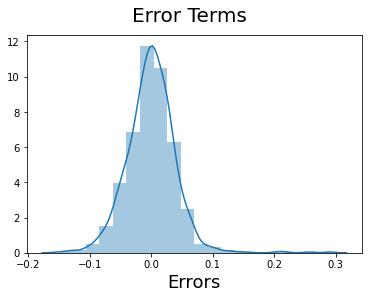

In [73]:
# plot the histogram
res = y_train - y_train_cnt
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [74]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)


In [75]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'Heating_OthW', 'BedroomAbvGr_8', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

### Making Predictions

In [76]:
# Now let's use the model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


In [77]:
X_test_new.columns

Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'Heating_OthW', 'BedroomAbvGr_8', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [78]:
# predictions

y_pred = lm5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

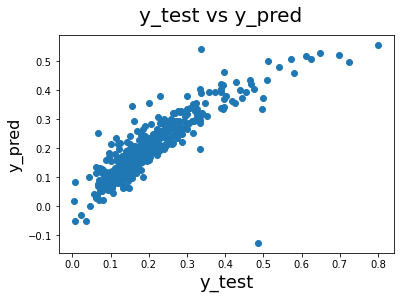

In [79]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [80]:
# R2 score of the test set
r2_score(y_true = y_test, y_pred = y_pred)

0.7534141229536685

In [81]:
from sklearn.metrics import r2_score, mean_squared_error

In [82]:
y_pred_train = y_train_cnt
y_pred_test = y_pred

In [83]:
# Calculating the R2 score, RSS, RMSE metrics for train and test sets:

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 score_train:", r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 score_test:", r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS score_train:", rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS score_test:", rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE score_train:", mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE score_test:", mse_test_lr)
metric.append(mse_test_lr**0.5)

R2 score_train: 0.8669391937008413
R2 score_test: 0.7534141229536685
RSS score_train: 1.6373170080790107
RSS score_test: 1.340396741711312
RMSE score_train: 0.0016036405563947215
RMSE score_test: 0.0030602665335874705


### 5. Ridge Regression

In [84]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.5s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.1}


In [86]:
#Fitting Ridge model for alpha = 0.1 and printing coefficients which have been penalised
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[ 0.14282435  0.28936275  0.21083777  0.24673045  0.19030963  0.09185897
 -0.03300014  0.19116666 -0.01958906 -0.53766506 -0.03546082 -0.01958906
  0.57217937  0.56098574  0.54306582  0.51567784  0.54847978  0.53376856
  0.66317791  0.01766089  0.01766089  0.01766089 -0.14749302 -0.03518364
  0.02266471  0.02266471]


In [87]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'Heating_OthW', 'BedroomAbvGr_8', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [88]:
X_test_new.columns

Index(['const', 'LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'Heating_OthW', 'BedroomAbvGr_8', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [89]:
X_test_new = X_test_new.drop(['const'], axis = 1)
X_test_new.columns

Index(['LotArea', 'OverallQual', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'BsmtQual_none', 'BsmtCond_none',
       'BsmtFinType1_none', 'Heating_OthW', 'BedroomAbvGr_8', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')

In [90]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric2.append(mse_test_lr**0.5)

R2 score_train:  0.8480323849788186
R2 score_test:  0.7735284981761882
RSS score_train:  1.8699658274425834
RSS score_test:  1.2310585941548795
RMSE score_train:  0.0018315042384354392
RMSE score_test:  0.002810636059714337


### 6. Lasso

In [91]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [92]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [93]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [94]:
lasso.coef_

array([ 0.10893245,  0.3199988 ,  0.1640175 ,  0.08873723,  0.08299344,
        0.        , -0.04781281,  0.3643144 , -0.02676851, -0.42779852,
       -0.02818868, -0.00044907,  0.10585127,  0.0509387 ,  0.02934158,
        0.        ,  0.08078456,  0.05079789,  0.20564035,  0.01722571,
        0.        ,  0.        , -0.06820285, -0.        ,  0.04050622,
        0.        ])

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric3.append(mse_test_lr**0.5)

R2 score_train:  0.7997070850547575
R2 score_test:  0.7801221377030754
RSS score_train:  2.4646100182217348
RSS score_test:  1.1952167485320748
RMSE score_train:  0.0024139177455648722
RMSE score_test:  0.0027288053619453764


In [96]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.866939,0.848032,0.799707
1,R2 Score (Test),0.753414,0.773528,0.780122
2,RSS (Train),1.637317,1.869966,2.464610
3,RSS (Test),1.340397,1.231059,1.195217
4,MSE (Train),0.040045,0.042796,0.049132
5,MSE (Test),0.055320,0.053015,0.052238


### Observation: changes in the coefficients after regularization

In [97]:
betas = pd.DataFrame(index=X_train_rfe.columns)

In [98]:
betas.rows = X_train_rfe.columns

In [99]:
betas['Linear'] = lm5.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [100]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
LotArea,0.146960,0.142824,0.108932
OverallQual,0.258376,0.289363,0.319999
BsmtFinSF1,0.260282,0.210838,0.164018
TotalBsmtSF,0.402327,0.246730,0.088737
1stFlrSF,0.158413,0.190310,0.082993
2ndFlrSF,0.114345,0.091859,0.000000
LowQualFinSF,-0.029342,-0.033000,-0.047813
GrLivArea,0.189714,0.191167,0.364314
MSSubClass_90,-0.023549,-0.019589,-0.026769
Condition2_PosN,-0.649300,-0.537665,-0.427799


### Q1: When the value of alpha is doubled

#### Ridge regression with 2*alpha

In [101]:
#Fitting Ridge model for alpha = 0.2 and printing coefficients which have been penalised

alpha = 0.2
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
print(ridge2.coef_)

[ 0.13783624  0.29926727  0.19230149  0.19838965  0.19630686  0.08334232
 -0.03466263  0.19260113 -0.01826896 -0.47470681 -0.03430935 -0.01826896
  0.3908267   0.36288997  0.34655873  0.32120716  0.36570385  0.34755385
  0.48010309  0.01443611  0.01443611  0.01443611 -0.13653808 -0.02683895
  0.02175959  0.02175959]


In [102]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_new)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric4.append(mse_test_lr**0.5)

R2 score_train:  0.8329045519250459
R2 score_test:  0.7815697391068681
RSS score_train:  2.056114243668426
RSS score_test:  1.1873478461108062
RMSE score_train:  0.00201382394090933
RMSE score_test:  0.0027108398313032108


#### Lasso regression with 2*alpha

In [103]:
#Fitting Lasso model for alpha = 0.0002 and printing coefficients which have been penalised

alpha =0.0002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0002)

In [104]:
lasso2.coef_

array([ 7.00939226e-02,  3.29473716e-01,  1.48718592e-01,  3.29949931e-02,
        1.17110797e-01,  0.00000000e+00, -3.75510641e-02,  3.38230558e-01,
       -2.23749942e-02, -2.98098985e-01, -2.15156674e-02, -3.91515868e-04,
        2.99035748e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.14539673e-01,  1.91856918e-03,
        2.95520468e-18,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.86092768e-02,  0.00000000e+00])

In [105]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_new)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric5.append(mse_test_lr**0.5)

R2 score_train:  0.7842544988821447
R2 score_test:  0.7874001091029701
RSS score_train:  2.6547545308165414
RSS score_test:  1.155654997196032
RMSE score_train:  0.0026001513524158094
RMSE score_test:  0.0026384817287580637


### Observations: Changes in co-efficients with double the value of alpha

In [106]:
gamma = pd.DataFrame(index=X_train_rfe.columns)

In [107]:
gamma.rows = X_train_rfe.columns

In [108]:
gamma['Ridge'] = ridge.coef_
gamma['Ridge2'] = ridge2.coef_
gamma['Lasso'] = lasso.coef_
gamma['Lasso2'] = lasso2.coef_

In [109]:
pd.set_option('display.max_rows', None)
gamma.head(68)

,Ridge,Ridge2,Lasso,Lasso2
LotArea,0.142824,0.137836,0.108932,7.009392e-02
OverallQual,0.289363,0.299267,0.319999,3.294737e-01
BsmtFinSF1,0.210838,0.192301,0.164018,1.487186e-01
TotalBsmtSF,0.246730,0.198390,0.088737,3.299499e-02
1stFlrSF,0.190310,0.196307,0.082993,1.171108e-01
2ndFlrSF,0.091859,0.083342,0.000000,0.000000e+00
LowQualFinSF,-0.033000,-0.034663,-0.047813,-3.755106e-02
GrLivArea,0.191167,0.192601,0.364314,3.382306e-01
MSSubClass_90,-0.019589,-0.018269,-0.026769,-2.237499e-02
Condition2_PosN,-0.537665,-0.474707,-0.427799,-2.980990e-01


In [110]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
rg_metric2 = pd.Series(metric4, name = 'Ridge Regression_2')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls_metric2 = pd.Series(metric5, name = 'Lasso Regression_2')

final_metric = pd.concat([lr_metric, rg_metric, rg_metric2, ls_metric, ls_metric2], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Ridge Regression_2,Lasso Regression,Lasso Regression_2
0,R2 Score (Train),0.866939,0.848032,0.832905,0.799707,0.784254
1,R2 Score (Test),0.753414,0.773528,0.781570,0.780122,0.787400
2,RSS (Train),1.637317,1.869966,2.056114,2.464610,2.654755
3,RSS (Test),1.340397,1.231059,1.187348,1.195217,1.155655
4,MSE (Train),0.040045,0.042796,0.044876,0.049132,0.050992
5,MSE (Test),0.055320,0.053015,0.052066,0.052238,0.051366


### Q3: After building the model, you realized that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [111]:
top5variables = ['GrLivArea', 'OverallQual', 'RoofMatl_WdShngl', 'BsmtFinSF1', 'LotArea']

In [112]:
#dropping the top5 variables from the train set
X_train_lasso_modified = X_train_rfe.drop(['GrLivArea', 'OverallQual', 'RoofMatl_WdShngl', 'BsmtFinSF1', 'LotArea'], axis = 1)

In [113]:
X_train_lasso_modified.columns

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'BsmtQual_none', 'BsmtCond_none', 'BsmtFinType1_none', 'Heating_OthW',
       'BedroomAbvGr_8', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [114]:
#dropping the top5 variables from the test set
X_test_lasso_modified = X_test_new.drop(['GrLivArea', 'OverallQual', 'RoofMatl_WdShngl', 'BsmtFinSF1', 'LotArea'], axis = 1)

In [115]:
X_test_lasso_modified.columns

Index(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'MSSubClass_90',
       'Condition2_PosN', 'BldgType_2fmCon', 'BldgType_Duplex',
       'RoofMatl_CompShg', 'RoofMatl_Membran', 'RoofMatl_Metal',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'BsmtQual_none', 'BsmtCond_none', 'BsmtFinType1_none', 'Heating_OthW',
       'BedroomAbvGr_8', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

#### Building the Lasso model after dropping the top 5 variables which was obtained from the first model


In [116]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso_modified, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.6s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [117]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


We observed that the optimal value of alpha remained the same using GridSearch even after dropping the top5 predictor variables.

In [118]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso_modified, y_train) 

Lasso(alpha=0.0001)

In [119]:
lasso.coef_

array([ 0.44388409,  0.5207724 ,  0.23767861, -0.05287002, -0.06932382,
       -0.47970989, -0.05705839, -0.00194706,  0.01976003,  0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.02858886,
        0.        ,  0.        , -0.0033133 , -0.        ,  0.06182792,
        0.        ])

In [120]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_lasso_modified)
y_pred_test = lasso.predict(X_test_lasso_modified)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 score_train: ', r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 score_test: ', r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS score_train: ', rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS score_test: ', rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE score_train: ', mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE score_test: ', mse_test_lr)
metric6.append(mse_test_lr**0.5)


R2 score_train:  0.6726215321554745
R2 score_test:  0.6494544531225319
RSS score_train:  4.028401363174951
RSS score_test:  1.905502920459972
RMSE score_train:  0.003945544919857934
RMSE score_test:  0.004350463288721397


In [121]:
# Printing the coefficients obtained from the model for the modified Lasso model

betas = pd.DataFrame(index=X_train_lasso_modified.columns)
betas.rows = X_train_lasso_modified.columns
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(30)

,Lasso
TotalBsmtSF,0.443884
1stFlrSF,0.520772
2ndFlrSF,0.237679
LowQualFinSF,-0.052870
MSSubClass_90,-0.069324
Condition2_PosN,-0.479710
BldgType_2fmCon,-0.057058
BldgType_Duplex,-0.001947
RoofMatl_CompShg,0.019760
RoofMatl_Membran,0.000000


### The answers to the subjective questions are shared in a separate document


## ********************* End of assignment*****************##